In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()
print(train_image.shape)

(60000, 28, 28)


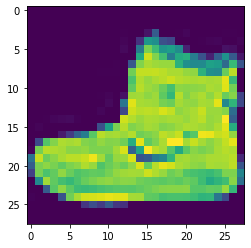

In [3]:
plt.imshow(train_image[0])
plt.show()

In [4]:
print(train_image[0])
print(np.max(train_image[0]))
print(np.min(train_image[0]))
print(train_label)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [8]:
model.fit(train_image, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5013 - acc: 0.8239
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3797 - acc: 0.8637
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3381 - acc: 0.8774
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3135 - acc: 0.8848
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2979 - acc: 0.8904


In [9]:
model.evaluate(test_image, test_label)

313/313 [==============================] - 2s 6ms/step - loss: 0.3509 - acc: 0.8727


[0.3509093225002289, 0.8726999759674072]

In [10]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
print(train_label_onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)
print(test_label_onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['acc'])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [15]:
model.fit(train_image, train_label_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5261 - acc: 0.8116
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4452 - acc: 0.8402
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4178 - acc: 0.8489
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4023 - acc: 0.8536
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3998 - acc: 0.8558


In [16]:
model.evaluate(test_image, test_label_onehot)

313/313 [==============================] - 0s 1ms/step - loss: 0.5179 - acc: 0.8187


[0.5179159045219421, 0.8187000155448914]

In [17]:
predict = model.predict(test_image)
print(predict)
print(predict.shape)

[[3.9927375e-08 1.7723735e-06 2.7246816e-11 ... 5.3309131e-02
  1.3239633e-06 7.6023751e-01]
 [2.2606837e-04 2.6526743e-09 9.9830985e-01 ... 1.7403684e-33
  2.9999470e-08 2.1775117e-27]
 [2.5274330e-15 1.0000000e+00 1.4274620e-26 ... 0.0000000e+00
  5.2556945e-17 0.0000000e+00]
 ...
 [4.4698331e-07 1.5146739e-08 2.8626603e-11 ... 6.2207415e-31
  9.9999726e-01 1.0867690e-19]
 [1.9023416e-15 1.0000000e+00 1.1968978e-23 ... 1.0258858e-34
  1.4125271e-12 1.1821469e-29]
 [8.0832196e-03 5.6727873e-07 5.2045200e-02 ... 5.9630307e-03
  4.3733317e-01 2.3879081e-03]]
(10000, 10)


In [18]:
print(predict[0])
print(np.argmax(predict[0]))

[3.9927375e-08 1.7723735e-06 2.7246816e-11 5.2145838e-06 1.8595113e-18
 1.8644489e-01 4.2658488e-08 5.3309131e-02 1.3239633e-06 7.6023751e-01]
9


In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [21]:
history = model.fit(train_image, train_label_onehot,
                    epochs=5,
                    validation_data=(test_image, test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8726 - acc: 0.6764 - val_loss: 0.5423 - val_acc: 0.8055
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6156 - acc: 0.7861 - val_loss: 0.4942 - val_acc: 0.8314
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5680 - acc: 0.8043 - val_loss: 0.4441 - val_acc: 0.8365
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5361 - acc: 0.8141 - val_loss: 0.4203 - val_acc: 0.8519
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5243 - acc: 0.8189 - val_loss: 0.4393 - val_acc: 0.8433


In [22]:
model.evaluate(test_image, test_label_onehot)

313/313 [==============================] - 0s 2ms/step - loss: 0.4393 - acc: 0.8433


[0.43933603167533875, 0.8432999849319458]

In [23]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


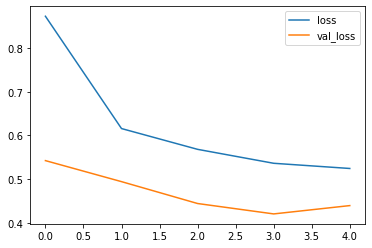

In [24]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

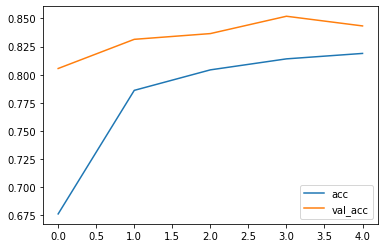

In [25]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
(train_image, train_lable), (test_image, test_lable) = tf.keras.datasets.fashion_mnist.load_data()

In [28]:
train_image.shape

(60000, 28, 28)

In [29]:
train_lable.shape

(60000,)

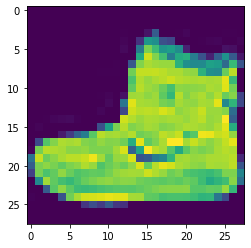

In [30]:
test_image.shape, test_lable.shape
plt.imshow(train_image[0])

In [31]:
np.max(train_image[0])
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
train_image = train_image/255
test_image = test_image/255

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [35]:
model.fit(train_image, train_lable, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5026 - acc: 0.8224
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - acc: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - acc: 0.8773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3146 - acc: 0.8861
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - acc: 0.8902


In [36]:
model.evaluate(test_image, test_lable)
train_lable

313/313 [==============================] - 2s 6ms/step - loss: 0.3545 - acc: 0.8715


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
train_lable_onehot = tf.keras.utils.to_categorical(train_lable)
train_lable_onehot[-1]
test_lable_onehot = tf.keras.utils.to_categorical(test_lable)
test_lable_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [40]:
model.fit(train_image, train_lable_onehot, epochs=5)
predict = model.predict(test_image)
predict.shape
predict[0]
np.argmax(predict[0])
test_lable[0]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5028 - acc: 0.8246
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3798 - acc: 0.8622
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3411 - acc: 0.8755
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3197 - acc: 0.8837
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3004 - acc: 0.8907


In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [43]:
model.fit(train_image, train_lable_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5248 - acc: 0.8142
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4427 - acc: 0.8441
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4225 - acc: 0.8513
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4041 - acc: 0.8569
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3993 - acc: 0.8591


In [44]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [47]:
model.fit(train_image, train_lable_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4914 - acc: 0.8219
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3649 - acc: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3298 - acc: 0.8785
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3076 - acc: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - acc: 0.8898
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - acc: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2627 - acc: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2515 - acc: 0.9054
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - acc: 0.9074
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2342 - acc: 0.9107


In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [50]:
history = model.fit(train_image, train_lable_onehot,
                   epochs=10,
                   validation_data=(test_image, test_lable_onehot))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8763 - acc: 0.6749 - val_loss: 0.5190 - val_acc: 0.8155
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6232 - acc: 0.7777 - val_loss: 0.4787 - val_acc: 0.8293
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5781 - acc: 0.7955 - val_loss: 0.4771 - val_acc: 0.8318
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5506 - acc: 0.8059 - val_loss: 0.4429 - val_acc: 0.8422
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5393 - acc: 0.8090 - val_loss: 0.4476 - val_acc: 0.8504
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5209 - acc: 0.8154 - val_loss: 0.4233 - val_acc: 0.8503
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5136 - acc: 0.8195 - val_loss: 0.4149 - val_acc: 0.8499
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

In [51]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

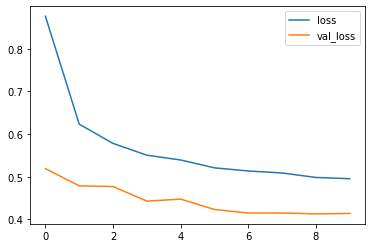

In [52]:
plt.plot(history.epoch, history.history.get('loss'),label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

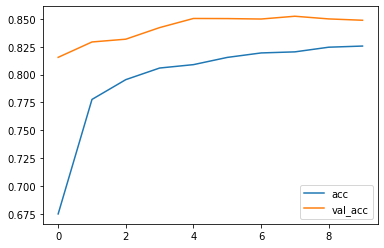

In [53]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [56]:
history = model.fit(train_image, train_lable_onehot,
                   epochs=10,
                   validation_data=(test_image, test_lable_onehot))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5510 - acc: 0.8107 - val_loss: 0.4626 - val_acc: 0.8376
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4127 - acc: 0.8552 - val_loss: 0.4309 - val_acc: 0.8463
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - acc: 0.8655 - val_loss: 0.3981 - val_acc: 0.8566
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3528 - acc: 0.8739 - val_loss: 0.3832 - val_acc: 0.8618
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - acc: 0.8780 - val_loss: 0.3712 - val_acc: 0.8677
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3232 - acc: 0.8831 - val_loss: 0.3622 - val_acc: 0.8697
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3150 - acc: 0.8849 - val_loss: 0.3689 - val_acc: 0.8683
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

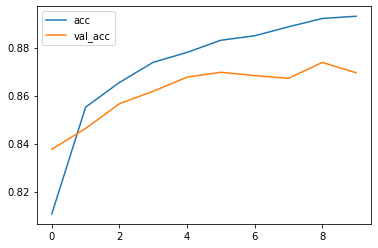

In [57]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()